# ADA 2018 -  Evolution of Music.

#### Andres Montero, Ariel Alba, Diego Iriarte




This project aims to find the relationships between tweets and music, specifically focus on tweets which reflect a positive sentiment or mood and we'll relate them to the kind of music those people listen to. We believe that music preferences vary depending on people's mood, so we can detect what kind of music people tend to listen to when they are feeling happy or posting tweets with positive sentiment, which in our case are equivalent.
For it, we'll work with two datasets:

* FMA: A Dataset For Music Analysis
* Sentiment140 dataset with 1.6 million tweets

Tweets dataset is a labeled set, indicating whether each tweet has a positive sentiment or not.
In order to define whether the proposed idea is feasible or not, we follow these steps:

**A)** Preprocessing and analyzing FMA dataset. Gather the data that will be used, the dataset is very extense and we must focus on the data that will be used for our study. We clean the data, define the type of variables, normalize them and deal with missing values. From the cleaned data, we get some statistical information of the dataset, such as most listened songs, albums and others. We try to find some relationships between some information of the dataset such as: danceability, energy, number of times listened, location and others, too.

**B)** Loading and analyzing of Sentiment140 dataset. We will only focus on tweets which are labeled as positive sentiment and the approach. The dataset contains few information about the tweets such as date, sentiment, userID and tweet, and is limited to tweets of yar 2009. Before doing any further preprocessing of such dataset we decided to check the possible relationships that we could find with FMA dataset.

**C)** Find relationships between both datasets. It is important to identify whether the idea of the project is feasible or not. For the idea to be feasible, we need to find a considerable number of positive tweets which are somehow related to music or songs. To measure this relationships our approach is the following:

* Count how many tweets are linked to a song
* Count how many tweets explicitly say spotify on it.
* Find words related to music contained in the tweets (may be a difficult task)

**D)** In case, our two first approaches to find the relationships between both datasets don't succeed, we may not be able to try with the third one due to time contraints and task difficulty. If this is the scenario, the project scope will be reduced and will mostly focus on the FMA dataset and a specific event in the past years which may caused an impact on music production and preferences. Such scenario will be defined according to the insights found in part A.


In [ ]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import os.path
import ast
import seaborn as sns

from helpers import *
from datetime import datetime, date, time
from scipy import stats

%load_ext autoreload
%autoreload 2


In [ ]:
# Constants
DATA_DIR = './data/'
MUSIC_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                                  file='fma_metadata')
PKL_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                               file='pkl')
DEBUG = True


In [ ]:
# Read  and wirte files depending on the existance of own path
genres_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='genres_df.pkl')
albums_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='albums_df.pkl')
artists_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='artists_df.pkl')
tracks_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                      file='tracks_df.pkl')
track_genre_rel_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                               file='track_genre_rel_df.pkl')
if os.path.exists(genres_df_path):
    genres_df = pd.read_pickle(genres_df_path)
else:
    print('There is no genres pandas data')
    
if os.path.exists(albums_df_path):
    albums_df = pd.read_pickle(albums_df_path)
else:
    print('There is no albums pandas data')
    
if os.path.exists(artists_df_path):
    artists_df = pd.read_pickle(artists_df_path)
else:
    print('There is no artists pandas data')
    
if os.path.exists(tracks_df_path):
    tracks_df = pd.read_pickle(tracks_df_path)
else:
    print('There is no tracks pandas data')
    
if os.path.exists(track_genre_rel_df_path):
    track_genre_rel_df = pd.read_pickle(track_genre_rel_df_path)
else:
    print('There is no tracks-genres pandas data')
    

In [ ]:
album_dist = albums_df.groupby(albums_df['album_date_released'].dt.year).size()

plt.figure(figsize=(9, 7))
ax = album_dist.plot(kind='bar')
plt.title("Distribution of Albums per Year")
plt.grid()
plt.xticks(rotation=90)

In [ ]:
tracks_albums = tracks_df.merge(albums_df)
tracks_dist = tracks_albums.groupby(tracks_albums['album_date_released'].dt.year).size()
plt.figure(figsize=(9, 7))
ax = tracks_dist.plot(kind='bar')
plt.title("Distribution of Tracks per Year")
plt.grid()
plt.xticks(rotation=90)

In [ ]:
track_artist = tracks_df.merge(artists_df, left_on='artist_id', 
                               right_on='artist_id')
country_grouped = track_artist.groupby(track_artist['country']).size()
country_top10 = country_grouped.sort_values(ascending=False) \
                                     .head(10)
country_top10.plot(kind='bar', 
                   title="Top 10 countries that produce tracks")
plt.ylabel('Number of Tracks')
plt.grid()


#### Top 10 albums

In [ ]:
albums_grouped = albums_df.groupby(albums_df['album_id']) \
                          .first()[['album_title', 'album_listens']]
albums_top10 = albums_grouped.sort_values(by='album_listens', 
                                          ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.title("Top 10 Albums listened")
plt.grid()
ax = sns.barplot(x='album_title', y= 'album_listens',
                 data=albums_top10)
plt.xticks(rotation=90)


#### Top 10 Tracks

In [ ]:
tracks_grouped = tracks_df.groupby(tracks_df['track_id']) \
                          .first()[['track_title', 'track_listens']]
tracks_top10 = tracks_grouped.sort_values(by='track_listens', 
                                          ascending=False).head(10)


albums_top10.plot(x='album_title', kind='bar', title="Top 10 Albums")
plt.grid()
plt.figure(figsize=(7, 5))
plt.title("Top 10 tracks listened")
plt.grid()
ax = sns.barplot(x='track_title', y= 'track_listens',
                 data=tracks_top10)
plt.xticks(rotation=45)


#### Relation between danceability and duration of the song

In [ ]:
tracks_df.insert(loc=13, column='track_duration_minutes',
                 value=(tracks_df['track_duration'] / 60))

tracks_df['track_duration_minutes'] = pd.to_numeric( \
                                            tracks_df['track_duration_minutes'])


In [ ]:
tracks_df['track_duration_minutes'] = tracks_df['track_duration_minutes'] \
                                                .apply(lambda x : np.rint(x))
sns.regplot(x='danceability', y='track_duration_minutes',
            data=tracks_df, ci=95, 
            line_kws = {'color': 'green'})


In [ ]:
tracks_df.head()


In [ ]:
tracks_df_correlation = tracks_df.dropna()
spearman_coeff = stats.spearmanr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The spearman correlation is: {}'.format(spearman_coeff))


In [ ]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The pearson correlation is: {}'.format(pearson_coeff))

#### Relation between valence and other variables

Valence refers to the degree of positive or negative emotions one perceives from a song. We'll try to find some relations between such varible and others.
Relation between track_listens and valence

In [ ]:
sns.regplot(x='valence', y='track_listens',
            data=tracks_df, ci=95, 
            line_kws ={'color': 'green'})


As seen in the plot, it is difficult to find a relationships between the valence of the song and the number of listens. We also tried to find relation between valence and energy, or valence and danceability and we found that such relationships are highly variable and do not show any dependance.

Mean value of valence per genre

In [ ]:
genre_valence = tracks_df.groupby('track_genre_top', 
                                  as_index=False)['valence'].mean()
genre_valence.plot(x='track_genre_top', kind='bar', 
                   title='Valence per genre')


In [ ]:
track_album = tracks_df.merge(albums_df, left_on='album_id',
                              right_on='album_id')

genre_year = track_album[['track_genres_all', 'album_date_released']]
genre_year.insert(loc=2, column='album_released_year',
                  value=(genre_year['album_date_released'].dt.year))
genre_year.head()


In [ ]:
top_genre = genre_year.groupby(genre_year['track_genres_all']).size()

In [ ]:
top_genre_sorted = top_genre.sort_values(ascending=False).head(10)
top_genre_sorted.plot(kind='bar', title="Top 10 Genres")
plt.grid()


In [ ]:
track_album.sort_values(by='album_date_released', ascending=False).head()

In [ ]:
track_album.sort_values(by='album_date_created').head()


In [ ]:
albums_df.head()

In [ ]:
albums_df.sort_values(by = ['album_date_released']).head()

In [ ]:
tracks_albums = tracks_df.merge(albums_df, how='inner')
tracks_albums.head()

In [ ]:
tracks_albums_summer = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <10)]
tracks_albums_summer.head()

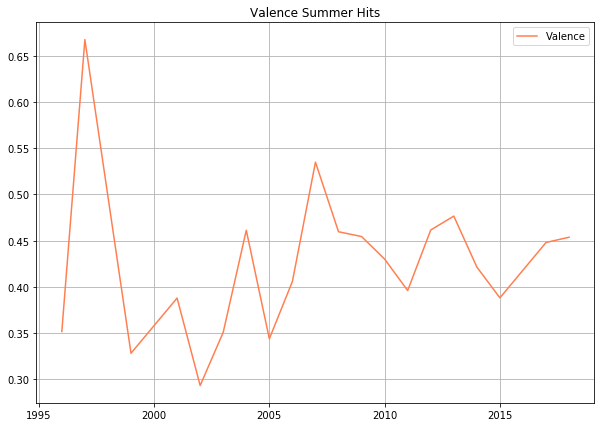

In [51]:
tracks_albums_summer_year = tracks_albums_summer.groupby([(tracks_albums_summer['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_valence = tracks_albums_summer_year_mean[['valence']]

plt.figure(figsize=(10, 7))
plt.title("Valence Summer Hits")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_year_mean_valence["valence"], color="coral", label="Valence")

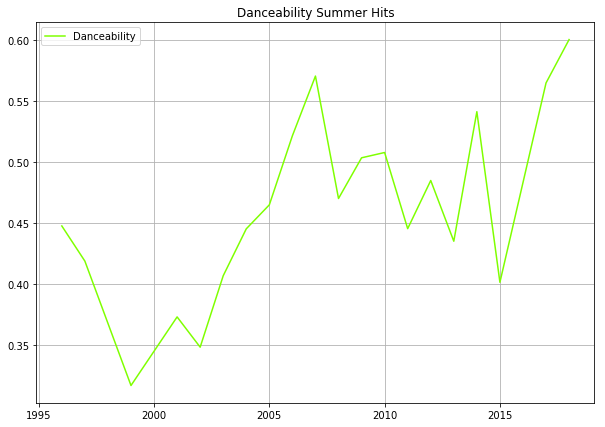

In [55]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_danceability = tracks_albums_summer_year_mean[['danceability']]

plt.figure(figsize=(10, 7))
plt.title("Danceability Summer Hits")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_year_mean_danceability["danceability"], color="chartreuse", label="Danceability")

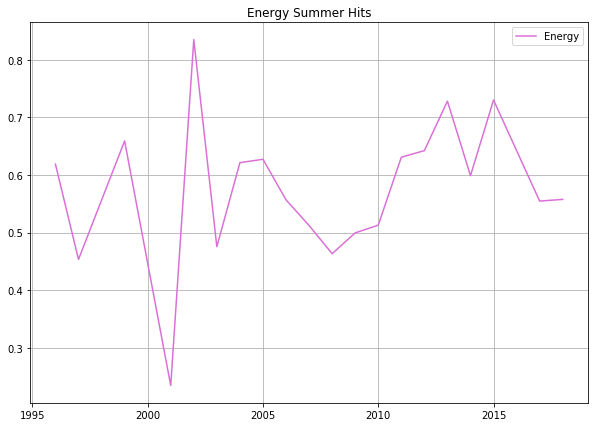

In [60]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_energy = tracks_albums_summer_year_mean[['energy']]

plt.figure(figsize=(10, 7))
plt.title("Energy Summer Hits")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_year_mean_energy["energy"], color="skyblue", label="Energy")

In [ ]:
tracks_albums_summer_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <10) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_summer_2010_year = tracks_albums_summer_2010.groupby([(tracks_albums_summer_2010['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer_2010['album_date_released'].dt.month.rename('month'))]).mean()


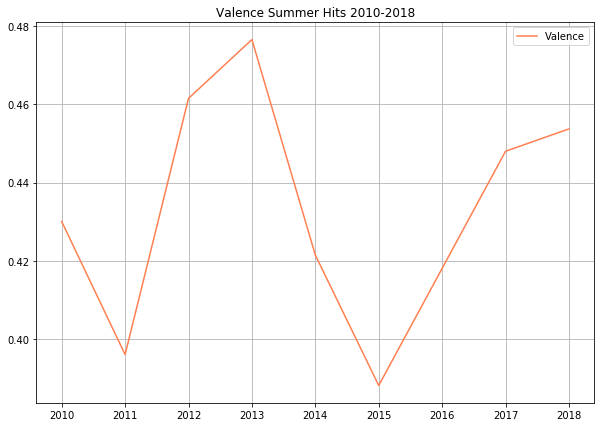

In [50]:
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_valence = tracks_albums_summer_2010_year_mean[['valence']]

plt.figure(figsize=(10, 7))
plt.title("Valence Summer Hits 2010-2018")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2010_year_mean_valence["valence"], color="coral", label="Valence")

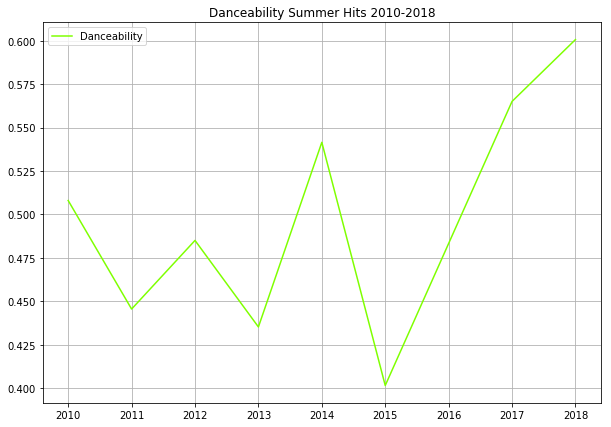

In [56]:
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_dancebility = tracks_albums_summer_2010_year_mean[['danceability']]

plt.figure(figsize=(10, 7))
plt.title("Danceability Summer Hits 2010-2018")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2010_year_mean_dancebility["danceability"], color="chartreuse", label="Danceability")

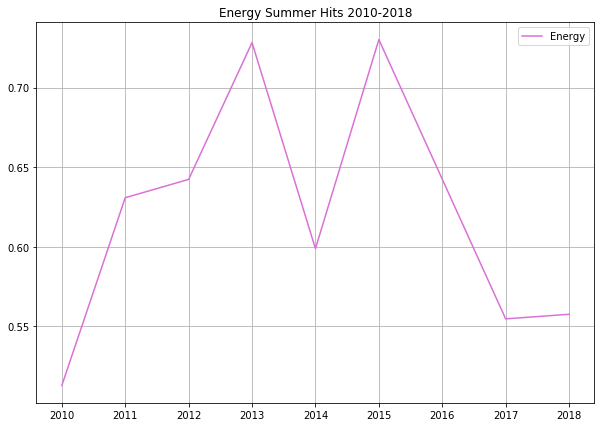

In [61]:
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('year').mean()
tracks_albums_summer_2010_year_mean_energy = tracks_albums_summer_2010_year_mean[['energy']]

plt.figure(figsize=(10, 7))
plt.title("Energy Summer Hits 2010-2018")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2010_year_mean_energy["energy"], color="skyblue", label="Energy")

In [64]:
tracks_albums_summer_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <10) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)                           ]
tracks_albums_summer_2000_year = tracks_albums_summer_2000.groupby([(tracks_albums_summer_2000['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer_2000['album_date_released'].dt.month.rename('month'))]).mean()


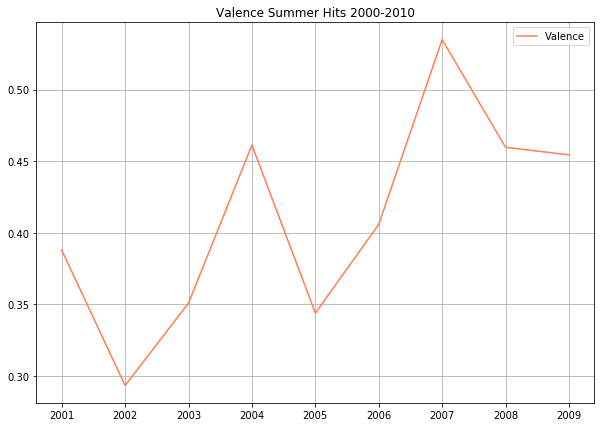

In [65]:
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_valence = tracks_albums_summer_2000_year_mean[['valence']]

plt.figure(figsize=(10, 7))
plt.title("Valence Summer Hits 2000-2010")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2000_year_mean_valence["valence"], color="coral", label="Valence")

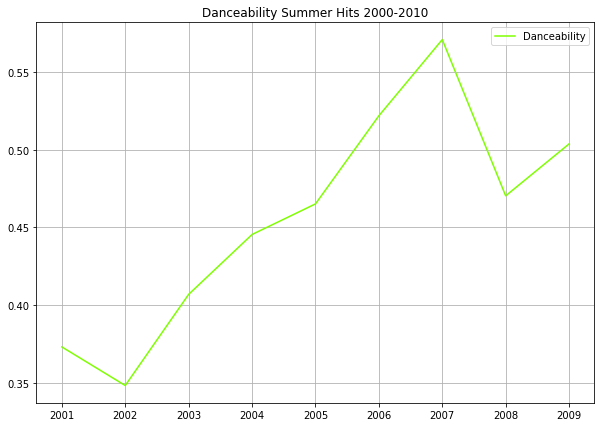

In [66]:
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_dancebility = tracks_albums_summer_2000_year_mean[['danceability']]

plt.figure(figsize=(10, 7))
plt.title("Danceability Summer Hits 2000-2010")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2000_year_mean_dancebility["danceability"], color="chartreuse", label="Danceability")

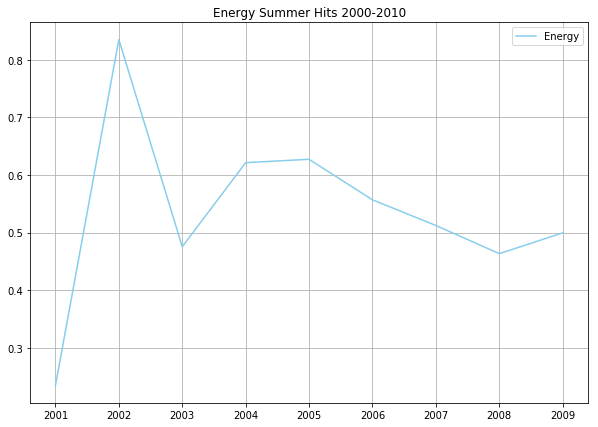

In [67]:
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('year').mean()
tracks_albums_summer_2000_year_mean_energy = tracks_albums_summer_2000_year_mean[['energy']]

plt.figure(figsize=(10, 7))
plt.title("Energy Summer Hits 2000-2010")
plt.grid()
ax = sns.lineplot(data=tracks_albums_summer_2000_year_mean_energy["energy"], color="skyblue", label="Energy")


In [68]:
tracks_albums_summer_2000_year_mean_energy

,energy
year,
2000,NaN
2001,0.234192
2002,0.835206
2003,0.475320
2004,0.621361
2005,0.627231
2006,0.556760
2007,0.512223
2008,0.463259
